In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=1 # alpha
L=1 # longueur de la tige
tmax=2 # le temps t où on veut aboutir
Nx=10 # le nombre de sous-intervalles dans [0,1]
Nt=500 # le nombre de sous-intervalles dans [0,tmax]
dx= L/Nx # delta x

dt=tmax/Nt

s=a*dt/dx**2
s

0.3999999999999999

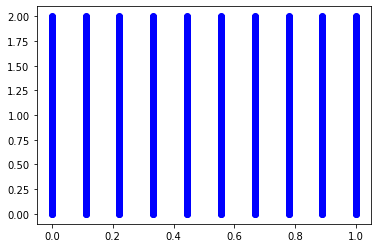

In [14]:
t=np.linspace(0,tmax,num=Nt,endpoint=True)
x=np.linspace(0,L,num=Nx,endpoint=True)

xx,tt=np.meshgrid(x,t)

plt.plot(xx,tt,'bo')
plt.show()

## Discrétisation de la dérivée première

Rappelons que l'expansion de Taylor nous dit : 
$$f(x_0+\Delta x)  = f(x_0)+\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_1),\quad x_1\in \left[x_0,x_0+\Delta x\right]$$

Ainsi, on obtient une expression pour $f'(x_0)$ en termes de valeurs autour de $x_0$.
$$f'(x_0)=\frac{1}{\Delta x}(f(x_0+\Delta x)-f(x_0))+E$$
où $E$ est le terme d'erreur, proportionnel à $(\Delta x)^2$.

Voici une autre approche, en considérant les deux côtés de $x_0$.
$$
\begin{align*}
f(x_0+\Delta x) & = f(x_0)+\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_1),\quad x_1\in [x_0,x_0+\Delta x] \\
f(x_0-\Delta x) & = f(x_0)-\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_2),\quad x_2\in [x_0-\Delta x,x_0]
\end{align*}
$$
En soustrayant la deuxième de la première, on obtient une autre expression pour $f'(x_0)$:
$$f'(x_0)=\frac{1}{2\Delta x}(f(x_0+\Delta x)-f(x_0-\Delta x))+E$$
où $E$ est le terme d'erreur, proportionnel à $(\Delta x)^2$.  Lorsque $(\Delta x)^2$ est suffisamment petit, on obtient une bonne approximation pour la valeur de la dérivée première, en termes des valeurs voisines.

## Discrétisation de la dérivée seconde
$$
\begin{align*}
f(x_0+\Delta x) & = f(x_0)+\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_0)+\frac{(\Delta x)^3}{6}f^{(3)}(x_1),\quad x_1\in [x_0,x_0+\Delta x] \\
f(x_0-\Delta x) & = f(x_0)-\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_0)+\frac{(\Delta x)^3}{6}f^{(3)}(x_2),\quad x_2\in [x_0-\Delta x,x_0]
\end{align*}
$$
Maintenant on additionne pour obtenir une expression pour $f''(x_0)$ :
$$f''(x_0)=\frac{1}{(\Delta x)^2}(f(x_0-\Delta x)-2f(x_0)+f(x_0+\Delta x))+E$$
où $E$ est le terme d'erreur, proportionnel à $(\Delta x)^3$.

On va discrétiser l'équation de la chaleur :
$$u_t=\alpha u_{xx}$$
En remplaçant par les expressions développées en haut :
$$
\begin{align*}
\frac{1}{\Delta t}(u(x_0,t_0+\Delta t)-u(x_0,t_0)) & = \frac{\alpha}{(\Delta x)^2}(u(x_0-\Delta x,t_0)-2u(x_0,t_0)+u(x_0+\Delta x,t_0)) \\
u(x_0,t_0+\Delta t) & = u(x_0,t_0) +\frac{\alpha\Delta t}{(\Delta x)^2}(u(x_0-\Delta x,t_0)-2u(x_0,t_0)+u(x_0+\Delta x,t_0))
\end{align*}
$$

On écrit $u$ comme une matrice, où chaque rangée correspond à une valeur de $x$ et chaque colonne correspond à une valeur de $t$.  La condition précédente devient alors : 
$$u(k,j)  = u(k,j-1) +\frac{\alpha\Delta t}{(\Delta x)^2}(u(k-1,j-1)-2u(k,j)+u(k+1,j))$$

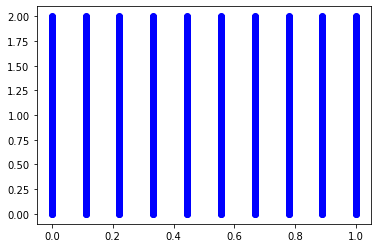

In [15]:
plt.plot(xx,tt,'bo')
plt.show()

## Regardons un exemple :
où $f(x)=0$ à tout point $x$ sauf un.

In [16]:
u=np.zeros((len(x),len(t)))
for j in np.arange(5,10):
    u[j,0]=1


In [17]:
u[:,0]

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [18]:
for j in np.arange(1,len(t)-1):
    for k in np.arange(1,len(x)-1):
        u[k,j]=u[k,j-1]+s*(u[k-1,j-1]-2*u[k,j-1]+u[k+1,j-1])

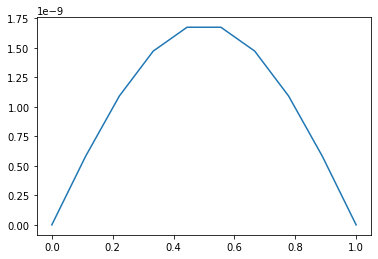

In [19]:
plt.plot(x,u[:,400])

## On change la condition initiale

In [20]:
f_in=np.where(x < L/2, (2/L)*x,(2/L)*(L-x) )

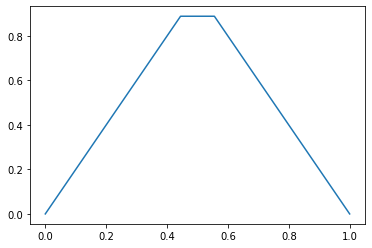

In [21]:
plt.plot(x,f_in)

In [22]:
u[:,0]=f_in

In [23]:
for j in np.arange(1,len(t)-1):
    for k in np.arange(1,len(x)-1):
        u[k,j]=u[k,j-1]+s*(u[k-1,j-1]-2*u[k,j-1]+u[k+1,j-1])

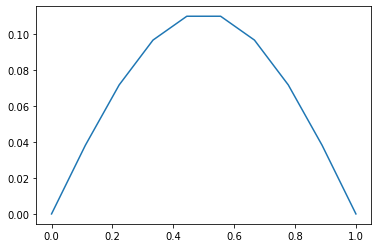

In [25]:
plt.plot(x,u[:,40])

## Série de Fourier

In [26]:
def fc(x):
    y=np.where(x < L/2, (2/L)*x,(2/L)*(L-x))
    return(y)


In [27]:
fc(0)

array(0.)

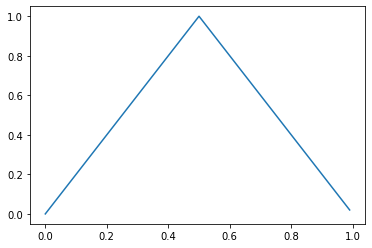

In [28]:
t=np.arange(0,1,.01)
y=fc(t)
plt.plot(t,y)

In [29]:
from scipy import integrate

def fourier_f(x,n):
    return(fc(x)*np.sin(n*np.pi*x/L))

def fourier_coeff(n):
    y,err=integrate.quad(fourier_f,0,L,args=(n,))
    return((2/L)*y)
    

In [30]:
fourier_coeff(1)

0.8105694691387022

In [46]:
R=10
Z=100

dr=1
dz=1
dt=1


r=np.arange(0,R+dr,dr) #vecteur ri
z=np.arange(0,Z+dz,dz) #vecteur ri
nr=len(r)
nz=len(z)
    
t=np.arange(0,N*dt+dt,dt) #vecteur temps t
nt=len(t) #nombre de points dans le vecteur t
    
Tinf=100. #degC
h=1000. #W/m^2.K

Tinitial=20. #degC, condition initiale
T=np.zeros([nr,nz])+Tinitial  #condition initiale 
TT=np.zeros([nr,nz,nt])
TT[:,:,0]=T

In [48]:
TT

array([[[20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.]],

       [[20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.]],

       [[20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0.,  0., ...,  0.,  0.,  0.

In [129]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 22 15:22:34 2019

@author: lebm1401

Adapté par Yannick Poulin-Giroux 
"""
import numpy as np
import matplotlib.pyplot as plt
#from numba import jit

# Ce code contient l'algorithme et le post-processing nécessaire à la simulation
# du transfert de chaleur 2D (r et z) transitoire en coordonnées cylindriques 
# dans un tige. Le cylindrique est refroidi/chauffé par convection aux limites.
# 


# Algorithme de différences finies
#@jit
def cylindre_convection(dr,dz,R,Z,dt,N):
    
    r=np.arange(0,R+dr,dr) #vecteur ri
    z=np.arange(0,Z+dz,dz) #vecteur ri
    nr=len(r)
    nz=len(z)
    
    t=np.arange(0,N*dt+dt,dt) #vecteur temps t
    nt=len(t) #nombre de points dans le vecteur t
    
#    Tinf=100. #degC
    Tinf=373.2 #K
    h=1000. #W/m^2.K
    
#    Tinitial=20. #degC, condition initiale
    Tinitial=293.2 #K, condition initiale
    T=np.zeros([nr,nz])+Tinitial  #condition initiale 
    TT=np.zeros([nr,nz,nt])
    TT[:,:,0]=T
    
    rho=1200 #kg/m^3
    Cp=3390 #J/kg.K
    k=0.55 #W/m.K    
    C1=k*dt/(rho*Cp) 
    

    for tt in range (1,nt):
        T0=T.copy()
        for i in np.arange (1,nr-1):
            for j in np.arange (1,nz-1):
                
                # Coefficients de l'équation discrétisée
                a=C1*(1./dr**2-1/(2*r[i]*dr))
                b=C1*(1./dr**2+1/(2*r[i]*dr))
                c=C1*(1./dz**2)
                d=C1*(1./dz**2)
                e=(1.-2.*C1/dr**2-2.*C1/dz**2)
                
                # Équation discrétisée 
                T[i,j]=a*T0[i-1,j]+b*T0[i+1,j]+c*T0[i,j-1]+d*T0[i,j+1]+e*T0[i,j]  # méthode explicite
                

        T[:,0]=(T[:,1]-h*dz/k*Tinf)/(1-h*dz/k)  # C.F à z=0, convection 
        T[:,nz-1]=(T[:,nz-2]+h*dz/k*Tinf)/(1+h*dz/k)   # C.F à z=Z, convection 
        T[nr-1,:]=(T[nr-2,:]+h*dr/k*Tinf)/(1+h*dr/k)  # C.F à r=R , convection  
        T[0,:]=T[1,:] # C.F. à r=0, adiabtique symétrie  
        
        TT[:,:,tt]=T
#        print(t[tt]) 
       
    return(r,z,t,TT)
    



In [130]:
dz=0.001 #m
dr=0.001 #m
R=0.05 #m
Z=0.15 #m
dt=1 #s
N=4500  # nb de pas de temps

(r,z,t,TT)=cylindre_convection(dr,dz,R,Z,dt,N)



In [131]:
TT[0,round(len(z)/2),:]-273.2

array([20.        , 20.        , 20.        , ..., 69.80028656,
       69.81067126, 69.82105275])

<a list of 10 text.Text objects>

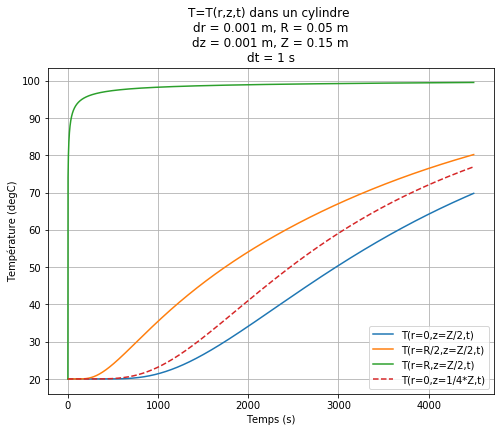

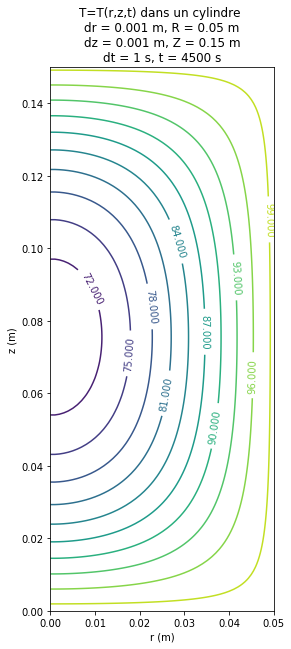

In [132]:
# Tout le reste n'est que du code pour visualiser les résultats

Tr0=TT[0,round(len(z)/2),:]-273.2
Tr05R=TT[round(len(r)/2),round(len(z)/2),:]-273.2
TrR=TT[-1,round(len(z)/2),:]-273.2
Tz025Z=TT[0,round(1/4*len(z)),:]-273.2

plt.figure(figsize=(8,6))
plt.plot(t,Tr0,t,Tr05R,t,TrR,t,Tz025Z,'--')
plt.xlabel('Temps (s)')
plt.ylabel('Température (degC)')
plt.grid(True)
t1='T=T(r,z,t) dans un cylindre \ndr = '+str(dr)+' m, R = '+str(R)+' m'
t2=t1+'\ndz = '+str(dz)+' m, Z = '+str(Z)+' m'
t3=t2+'\ndt = '+str(dt)+' s'
plt.title(t3)
plt.legend(['T(r=0,z=Z/2,t)','T(r=R/2,z=Z/2,t)','T(r=R,z=Z/2,t)','T(r=0,z=1/4*Z,t)'],loc=4)
#plt.savefig("cylindre_2.png", bbox_inches='tight')



iii=4500
nb_cont=10
plt.figure(figsize=(4,10))
plt.xlabel('r (m)')
plt.ylabel('z (m)')
t1='T=T(r,z,t) dans un cylindre \ndr = '+str(dr)+' m, R = '+str(R)+' m'
t2=t1+'\ndz = '+str(dz)+' m, Z = '+str(Z)+' m'
t3=t2+'\ndt = '+str(dt)+' s, t = '+str(t[iii])+' s'
plt.title(t3)
#for iii in range(0,len(t)):
CS=plt.contour(r,z,np.transpose(TT[:,:,iii]-273.2),nb_cont)
plt.clabel(CS, inline=1, fontsize=10)
#plt.savefig("cylindre_1.png", bbox_inches='tight')

In [59]:
plt.show()